<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from numpy import mean
from sklearn.metrics import matthews_corrcoef

In [52]:
df = pd.read_csv("data.csv", sep=';')
clmns = df.columns[:-1]
N = len(clmns)
M = len(df)
a = [0 for i in range(M)]
for i in range(M) :
  if df['diagnosis'][i] == 1 :
    a[i] = 0
  else :
    a[i] = 1
df['diagnosis'] = a
for clmn in clmns :
  a = [0 for i in range(M)]
  for i in range(M) :
    try :
      a[i] = float(df[clmn][i])
    except :
      a[i] = np.NaN
  df[clmn] = a
df.drop(columns=['J'], axis=1, inplace=True)
N -= 1
clmns = df.columns[:-1]
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)


In [53]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,0
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,0
416,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,1
417,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,1
418,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,0


In [55]:
cible=df["diagnosis"]

In [56]:
cible

0      1
1      1
2      1
3      0
4      1
      ..
415    0
416    1
417    1
418    0
419    0
Name: diagnosis, Length: 420, dtype: int64

In [32]:
X=df

In [33]:
X=df

In [34]:
del X["diagnosis"] 

In [35]:
X

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
416,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
417,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
418,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


In [54]:
def transform(X, fs) :
  X_ = X.copy()
  for i in range(len(fs)) :
    if fs[i] == 0 :
      X_.drop([clmns[i]], axis=1, inplace=True)
  return X_

# DFS_XGB_ACC

In [60]:
fs_acc=[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [61]:
feature_ACC=transform(X,fs_acc)

In [62]:
feature_ACC

,age,height,weight,qrs_duration,t_interval,T,heart_rate,q_wave,s_wave,AA,...,IJ,IV,JB,JC,JG,JH,JZ,KH,KK,LE
0,75.0,190.0,80.0,91.0,174.0,13.0,63.0,0.0,44.0,32.0,...,0.0,0.0,-24.0,-29.7,-6.4,0.0,52.7,5.1,-0.4,2.9
1,56.0,165.0,64.0,81.0,149.0,37.0,53.0,0.0,0.0,24.0,...,0.0,0.0,-21.6,-26.8,-7.9,0.0,27.7,2.6,-0.4,2.1
2,54.0,172.0,95.0,138.0,185.0,34.0,75.0,0.0,80.0,24.0,...,0.0,6.5,18.7,-13.6,-4.1,7.4,23.3,2.2,1.3,3.4
3,55.0,175.0,94.0,100.0,179.0,11.0,71.0,0.0,20.0,48.0,...,-2.5,0.0,-18.2,-22.4,-6.9,0.0,51.0,3.3,0.1,2.6
4,13.0,169.0,51.0,100.0,174.0,66.0,84.0,0.0,48.0,20.0,...,-0.7,0.0,-61.2,-59.9,-43.3,0.0,-72.8,5.9,0.6,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,53.0,160.0,70.0,80.0,154.0,4.0,63.0,0.0,24.0,28.0,...,-4.4,0.0,-18.6,-19.7,-8.2,0.0,3.8,1.4,0.1,0.6
416,37.0,190.0,85.0,100.0,201.0,66.0,73.0,0.0,36.0,24.0,...,0.0,0.0,-5.3,21.2,-8.9,0.0,137.8,5.9,-0.7,2.4
417,36.0,166.0,68.0,108.0,194.0,-19.0,84.0,16.0,40.0,40.0,...,-15.4,12.6,23.1,-0.9,-6.1,0.0,-146.2,-8.2,0.2,1.0
418,32.0,155.0,55.0,93.0,218.0,29.0,80.0,0.0,0.0,32.0,...,0.0,0.0,-28.7,-16.3,-14.0,0.0,94.4,3.8,0.1,2.4


In [63]:
def specificite(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(specificite, greater_is_better=True)
def MCC(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(MCC, greater_is_better=True)
def présicion_positive(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
my_scorer2 = make_scorer(présicion_positive, greater_is_better=True)
def présicion_négative(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
my_scorer3 = make_scorer(présicion_négative, greater_is_better=True)
def VN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]
    return value
my_scorer4 = make_scorer(VN, greater_is_better=True)
def VP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,1]
    return value
my_scorer5 = make_scorer(VP, greater_is_better=True)
def FP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,1]
    return value
my_scorer6 = make_scorer(FP, greater_is_better=True)
def FN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,0]
    return value
my_scorer7 = make_scorer(FN, greater_is_better=True)



In [66]:
algo=XGBClassifier(random_state=0)

In [67]:
cv = StratifiedKFold(n_splits=5)

In [72]:
# evaluate model
scores1 = cross_val_score(algo, feature_ACC, cible, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(algo, feature_ACC, cible, scoring='recall', cv=cv, n_jobs=-1)
scores3 = cross_val_score(algo, feature_ACC, cible, scoring=my_scorer, cv=cv, n_jobs=-1)
scores4 = cross_val_score(algo, feature_ACC, cible, scoring=my_scorer1, cv=cv, n_jobs=-1)
scores5 = cross_val_score(algo, feature_ACC, cible, scoring=my_scorer2, cv=cv, n_jobs=-1)
scores6 = cross_val_score(algo, feature_ACC, cible, scoring=my_scorer3, cv=cv, n_jobs=-1)
scores7 = cross_val_score(algo, feature_ACC, cible, scoring='roc_auc', cv=cv, n_jobs=-1)
scores8 = cross_val_score(algo, feature_ACC, cible, scoring=my_scorer4, cv=cv, n_jobs=-1)
scores9 = cross_val_score(algo, feature_ACC, cible, scoring=my_scorer5, cv=cv, n_jobs=-1)
scores10 = cross_val_score(algo,feature_ACC, cible, scoring=my_scorer6, cv=cv, n_jobs=-1)
scores11 = cross_val_score(algo, feature_ACC, cible, scoring=my_scorer7, cv=cv, n_jobs=-1)
# report performance
print('Accuracy:',scores1)
print('moy_accuracy: %f' % mean(scores1))
print("-------------------------------------------------")
print('sensibilité :',scores2)
print('moy_sensibilité: %f' % mean(scores2))
print("-------------------------------------------------")
print('spécificité :',scores3)
print('moy_spécificité: %f' % mean(scores3))
print("-------------------------------------------------")
print('MCC :',scores4)
print('MCC: %f' % mean(scores4))
print("-------------------------------------------------")
print('precision-po:',scores5)
print('moy_precision-po: %f' % mean(scores5))
print("-------------------------------------------------")
print('precision-ne :',scores6)
print('moy_precision-ne: %f' % mean(scores6))
print("-------------------------------------------------")
print('AUC :',scores7)
print('moy_AUC: %f' % mean(scores7))
print("-------------------------------------------------")
print('VN :',scores8)
print('VP :',scores9)
print('FP :',scores10)
print('FN :',scores11)
print("-------------------------------------------------")
print("-------------------------------------------------")




Accuracy: [0.9047619  0.8452381  0.88095238 0.9047619  0.9047619 ]
moy_accuracy: 0.888095
-------------------------------------------------
sensibilité : [0.78378378 0.72972973 0.86486486 0.83333333 0.83333333]
moy_sensibilité: 0.809009
-------------------------------------------------
spécificité : [1.         0.93617021 0.89361702 0.95833333 0.95833333]
moy_spécificité: 0.949291
-------------------------------------------------
MCC : [0.81840019 0.68992401 0.75848189 0.80674739 0.80674739]
MCC: 0.776060
-------------------------------------------------
precision-po: [1.         0.9        0.86486486 0.9375     0.9375    ]
moy_precision-po: 0.927973
-------------------------------------------------
precision-ne : [0.85454545 0.81481481 0.89361702 0.88461538 0.88461538]
moy_precision-ne: 0.866442
-------------------------------------------------
AUC : [0.94019551 0.90741806 0.88844163 0.91087963 0.90219907]
moy_AUC: 0.909827
-------------------------------------------------
VN : [47 44

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

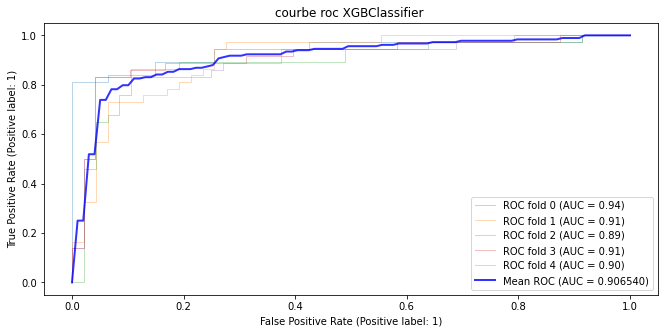

In [82]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(11, 5))
for i, (train, test) in enumerate(cv.split(feature_ACC, cible)):
         algo.fit(feature_ACC.loc[train,], cible.loc[train,])
         viz = plot_roc_curve(algo,  feature_ACC.loc[test,], cible.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
label=r'Mean ROC (AUC = %f)' % (mean_auc),
        lw=2, alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
ax.legend(loc="lower right")


# DFS_XGB_AUC

In [77]:
fs_auc= [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [78]:
feature_AUC=transform(X,fs_auc)

In [80]:
feature_AUC

,age,height,weight,qrs_duration,t_interval,T,heart_rate,q_wave,s_wave,AU,...,JG,JH,JL,JZ,KH,KK,KM,KN,KY,LE
0,75.0,190.0,80.0,91.0,174.0,13.0,63.0,0.0,44.0,52.0,...,-6.4,0.0,-12.6,52.7,5.1,-0.4,13.5,-4.0,0.0,2.9
1,56.0,165.0,64.0,81.0,149.0,37.0,53.0,0.0,0.0,32.0,...,-7.9,0.0,-16.4,27.7,2.6,-0.4,11.0,-2.4,0.0,2.1
2,54.0,172.0,95.0,138.0,185.0,34.0,75.0,0.0,80.0,28.0,...,-4.1,7.4,20.9,23.3,2.2,1.3,11.1,-3.4,0.0,3.4
3,55.0,175.0,94.0,100.0,179.0,11.0,71.0,0.0,20.0,20.0,...,-6.9,0.0,-12.7,51.0,3.3,0.1,15.2,-3.7,0.0,2.6
4,13.0,169.0,51.0,100.0,174.0,66.0,84.0,0.0,48.0,24.0,...,-43.3,0.0,-111.4,-72.8,5.9,0.6,19.5,-11.4,-0.6,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,53.0,160.0,70.0,80.0,154.0,4.0,63.0,0.0,24.0,0.0,...,-8.2,0.0,-22.5,3.8,1.4,0.1,4.1,-8.3,0.0,0.6
416,37.0,190.0,85.0,100.0,201.0,66.0,73.0,0.0,36.0,0.0,...,-8.9,0.0,-14.3,137.8,5.9,-0.7,21.2,-2.8,0.0,2.4
417,36.0,166.0,68.0,108.0,194.0,-19.0,84.0,16.0,40.0,0.0,...,-6.1,0.0,72.9,-146.2,-8.2,0.2,22.0,-30.8,0.0,1.0
418,32.0,155.0,55.0,93.0,218.0,29.0,80.0,0.0,0.0,16.0,...,-14.0,0.0,-16.8,94.4,3.8,0.1,15.3,-3.5,-0.4,2.4


In [81]:
# evaluate model
scores1 = cross_val_score(algo, feature_AUC, cible, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(algo, feature_AUC, cible, scoring='recall', cv=cv, n_jobs=-1)
scores3 = cross_val_score(algo, feature_AUC, cible, scoring=my_scorer, cv=cv, n_jobs=-1)
scores4 = cross_val_score(algo, feature_AUC, cible, scoring=my_scorer1, cv=cv, n_jobs=-1)
scores5 = cross_val_score(algo, feature_AUC, cible, scoring=my_scorer2, cv=cv, n_jobs=-1)
scores6 = cross_val_score(algo, feature_AUC, cible, scoring=my_scorer3, cv=cv, n_jobs=-1)
scores7 = cross_val_score(algo, feature_AUC, cible, scoring='roc_auc', cv=cv, n_jobs=-1)
scores8 = cross_val_score(algo, feature_AUC, cible, scoring=my_scorer4, cv=cv, n_jobs=-1)
scores9 = cross_val_score(algo, feature_AUC, cible, scoring=my_scorer5, cv=cv, n_jobs=-1)
scores10 = cross_val_score(algo,feature_AUC, cible, scoring=my_scorer6, cv=cv, n_jobs=-1)
scores11 = cross_val_score(algo, feature_AUC, cible, scoring=my_scorer7, cv=cv, n_jobs=-1)
# report performance
print('Accuracy:',scores1)
print('moy_accuracy: %f' % mean(scores1))
print("-------------------------------------------------")
print('sensibilité :',scores2)
print('moy_sensibilité: %f' % mean(scores2))
print("-------------------------------------------------")
print('spécificité :',scores3)
print('moy_spécificité: %f' % mean(scores3))
print("-------------------------------------------------")
print('MCC :',scores4)
print('MCC: %f' % mean(scores4))
print("-------------------------------------------------")
print('precision-po:',scores5)
print('moy_precision-po: %f' % mean(scores5))
print("-------------------------------------------------")
print('precision-ne :',scores6)
print('moy_precision-ne: %f' % mean(scores6))
print("-------------------------------------------------")
print('AUC :',scores7)
print('moy_AUC: %f' % mean(scores7))
print("-------------------------------------------------")
print('VN :',scores8)
print('VP :',scores9)
print('FP :',scores10)
print('FN :',scores11)
print("-------------------------------------------------")
print("-------------------------------------------------")




Accuracy: [0.85714286 0.80952381 0.83333333 0.88095238 0.88095238]
moy_accuracy: 0.852381
-------------------------------------------------
sensibilité : [0.67567568 0.62162162 0.78378378 0.80555556 0.83333333]
moy_sensibilité: 0.743994
-------------------------------------------------
spécificité : [1.         0.95744681 0.87234043 0.9375     0.91666667]
moy_spécificité: 0.936791
-------------------------------------------------
MCC : [0.73365531 0.62875821 0.66069922 0.75721027 0.75615125]
MCC: 0.707295
-------------------------------------------------
precision-po: [1.         0.92       0.82857143 0.90625    0.88235294]
moy_precision-po: 0.907435
-------------------------------------------------
precision-ne : [0.79661017 0.76271186 0.83673469 0.86538462 0.88      ]
moy_precision-ne: 0.828288
-------------------------------------------------
AUC : [0.95457159 0.93444508 0.90339275 0.92881944 0.93923611]
moy_AUC: 0.932093
-------------------------------------------------
VN : [47 45

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

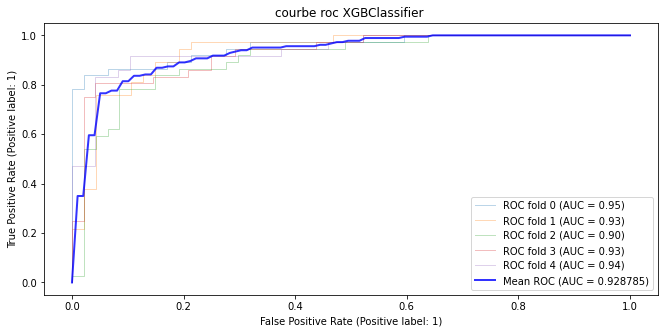

In [83]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(11, 5))
for i, (train, test) in enumerate(cv.split(feature_AUC, cible)):
         algo.fit(feature_AUC.loc[train,], cible.loc[train,])
         viz = plot_roc_curve(algo,  feature_AUC.loc[test,], cible.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
label=r'Mean ROC (AUC = %f)' % (mean_auc),
        lw=2, alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
ax.legend(loc="lower right")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

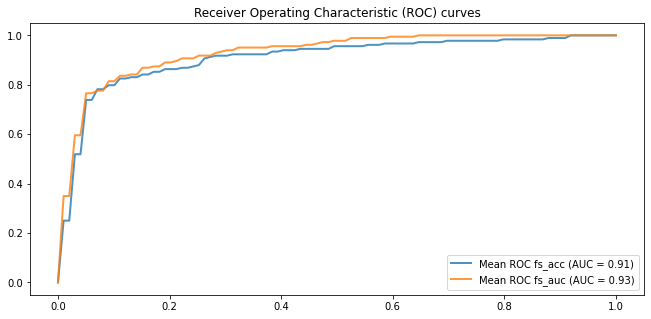

In [84]:
fs={"fs_acc":[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    "fs_auc":[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
}
# prepare plots
fig, ax_roc = plt.subplots(figsize=(11, 5))
cv = StratifiedKFold(n_splits=5)
random_state = np.random.RandomState(0)
for name, fs in fs.items():
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  X_=X
  feature=transform(X_,fs)
  for i, (train, test) in enumerate(cv.split(feature, cible)):
    algo.fit(feature.loc[train,], cible.loc[train,])
    viz = plot_roc_curve(algo, feature.loc[test,], cible.loc[test,],
                         name='ROC fold {}'.format(i),alpha=0.3, lw=1, ax=ax) 
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax_roc.plot(mean_fpr, mean_tpr,
  label=r'Mean ROC %s (AUC = %0.2f)' % (name, mean_auc),lw=2, alpha=.8)
ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
plt.legend() 
plt.show()
